In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

print("Necessary libraries imported.")

Necessary libraries imported.


In [6]:
df = pd.read_csv('/content/drive/MyDrive/CodeAlpha Intern/Task 02 - Handwritten Character Recognition/english.csv')
print("Dataset loaded successfully.")
print(f"Number of records: {len(df)}")
df.head()

Dataset loaded successfully.
Number of records: 3410


,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [9]:
df = pd.read_csv('/content/drive/MyDrive/CodeAlpha Intern/Task 02 - Handwritten Character Recognition/english.csv')
print("Dataset loaded successfully.")
print(f"Number of records: {len(df)}")
df.head()

Dataset loaded successfully.
Number of records: 3410


,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [10]:
images = []
labels = []

print("Empty lists 'images' and 'labels' initialized.")

Empty lists 'images' and 'labels' initialized.


In [14]:
import os # Ensure os is imported

# Re-initialize lists
images = []
labels = []

# Correct the base_image_path
base_image_path = '/content/drive/MyDrive/CodeAlpha Intern/Task 02 - Handwritten Character Recognition/'

for index, row in df.iterrows():
    # Construct the full image path using the corrected base_image_path
    img_path = os.path.join(base_image_path, row['image'])
    img = cv2.imread(img_path)

    if img is None:
        print(f"Warning: Could not load image {img_path}. Skipping.")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64, 64))
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=-1)  # Reshape to (64, 64, 1)

    images.append(img)
    labels.append(row['label'])

print(f"Processed {len(images)} images and their labels.")
print(f"First 5 processed image shapes: {[img.shape for img in images[:5]]}")
print(f"First 5 labels: {labels[:5]}")

Processed 3410 images and their labels.
First 5 processed image shapes: [(64, 64, 1), (64, 64, 1), (64, 64, 1), (64, 64, 1), (64, 64, 1)]
First 5 labels: ['0', '0', '0', '0', '0']


In [15]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

print(f"Original labels (first 5): {labels[:5]}")
print(f"Encoded labels (first 5): {encoded_labels[:5]}")
print(f"Number of unique encoded labels: {len(np.unique(encoded_labels))}")

Original labels (first 5): ['0', '0', '0', '0', '0']
Encoded labels (first 5): [0 0 0 0 0]
Number of unique encoded labels: 62


In [16]:
X = np.array(images)
y = np.array(encoded_labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (2728, 64, 64, 1)
Shape of X_test: (682, 64, 64, 1)
Shape of y_train: (2728,)
Shape of y_test: (682,)


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

print("TensorFlow and Keras modules imported successfully.")

TensorFlow and Keras modules imported successfully.


In [18]:
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# Dense hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer (62 units for 62 classes)
model.add(Dense(62, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("CNN model architecture defined and compiled successfully.")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN model architecture defined and compiled successfully.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │        15,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,288,510 (4.92 MB)

 Trainable params: 1,288,510 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
print("Model training complete.")

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 22s 266ms/step - accuracy: 0.0124 - loss: 4.1661 - val_accuracy: 0.0073 - val_loss: 4.1291
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 264ms/step - accuracy: 0.0177 - loss: 4.1235 - val_accuracy: 0.0366 - val_loss: 4.0964
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 279ms/step - accuracy: 0.0422 - loss: 4.0153 - val_accuracy: 0.1648 - val_loss: 3.5058
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 254ms/step - accuracy: 0.1417 - loss: 3.4447 - val_accuracy: 0.2912 - val_loss: 2.8877
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 262ms/step - accuracy: 0.2266 - loss: 2.9165 - val_accuracy: 0.4322 - val_loss: 2.2856
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 294ms/step - accuracy: 0.3459 - loss: 2.3481 - val_accuracy: 0.5147 - val_loss: 1.8663
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 260ms/step - accuracy: 0.4520 - loss: 1.9189 - val_accuracy: 0.6190 - val_loss: 1.6050
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 262ms/step - accuracy: 0.5228 - loss: 1.6574 - val_accu

In [20]:
import matplotlib.pyplot as plt

print("Matplotlib imported for plotting.")

Matplotlib imported for plotting.


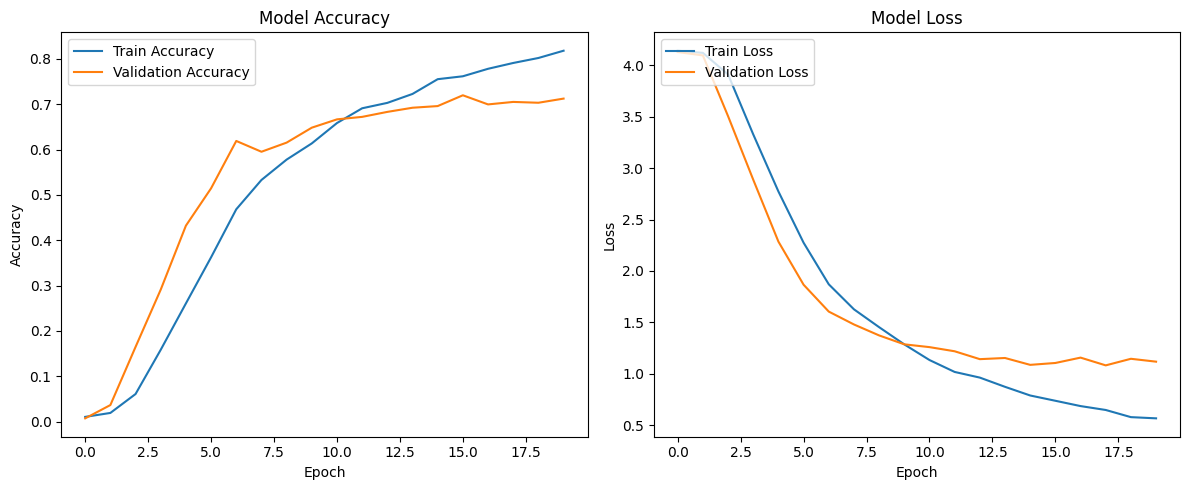

Accuracy and Loss plots displayed.


In [21]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

print("Accuracy and Loss plots displayed.")

In [22]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print(f"Predicted labels (first 5): {y_pred[:5]}")
print(f"True labels (first 5): {y_test[:5]}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step
Predicted labels (first 5): [58 32  3 38  0]
True labels (first 5): [57 32  3 12 50]


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print("Scikit-learn metrics imported successfully.")

Scikit-learn metrics imported successfully.


In [24]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.43      0.40        14
           1       0.50      0.55      0.52        11
           2       0.75      0.60      0.67        10
           3       0.76      0.80      0.78        20
           4       0.86      0.86      0.86        14
           5       1.00      0.75      0.86        16
           6       1.00      0.67      0.80         9
           7       0.85      0.73      0.79        15
           8       0.59      0.83      0.69        12
           9       0.73      0.73      0.73        11
           A       1.00      0.94      0.97        16
           B       0.78      0.78      0.78         9
           C       0.55      0.67      0.60         9
           D       0.83      1.00      0.91        10
           E       0.93      0.93      0.93        15
           F       0.93      0.93      0.93        14
           G       0.82      0.90      0.86        10
    

In [25]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 6  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0  6 ...  0  0  0]
 ...
 [ 0  0  1 ... 10  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  7]]


In [26]:
def predict_character(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return None, None

    # Preprocess the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64, 64))
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=-1)  # Reshape to (64, 64, 1)
    img = np.expand_dims(img, axis=0)   # Add batch dimension (1, 64, 64, 1)

    # Make prediction
    prediction_probabilities = model.predict(img)
    predicted_label_index = np.argmax(prediction_probabilities)
    confidence = prediction_probabilities[0][predicted_label_index] * 100

    # Decode the predicted label
    predicted_char = label_encoder.inverse_transform([predicted_label_index])[0]

    return predicted_char, confidence

print("predict_character function defined.")

predict_character function defined.
